In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [45]:
data = pd.read_csv('train.csv')  # Replace with your file path
data.head()

,Row ID,Ship Mode,Segment,Country,State,Postal Code,Region,Sub-Category,Product Name,Sales,Year,Month,Day,Weekday
0,7981,3,0,0,41,77095.0,0,12,1080,-0.539709,2015,1,3,5
1,742,3,2,0,11,60540.0,0,3,707,-0.581911,2015,1,4,6
2,741,3,2,0,11,60540.0,0,14,1363,0.298214,2015,1,4,6
3,740,3,2,0,11,60540.0,0,10,217,-0.554957,2015,1,4,6
4,1760,3,0,0,36,19143.0,1,2,250,-0.529612,2015,1,5,0


In [67]:
data.columns=data.columns.str.strip().str.lower() 
print(data.columns)

data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data = data.sort_values('date')
# STEP 1: Clean Column Names
data.columns = (
    data.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
)



Index(['row id', 'ship mode', 'segment', 'country', 'state', 'postal code',
       'region', 'sub-category', 'product name', 'sales', 'year', 'month',
       'day', 'weekday', 'date'],
      dtype='object')


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9677 entries, 0 to 9676
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   row_id        9677 non-null   int64         
 1   ship_mode     9677 non-null   int64         
 2   segment       9677 non-null   int64         
 3   country       9677 non-null   int64         
 4   state         9677 non-null   int64         
 5   postal_code   9677 non-null   float64       
 6   region        9677 non-null   int64         
 7   sub_category  9677 non-null   int64         
 8   product_name  9677 non-null   int64         
 9   sales         9677 non-null   float64       
 10  year          9677 non-null   int64         
 11  month         9677 non-null   int64         
 12  day           9677 non-null   int64         
 13  weekday       9677 non-null   int64         
 14  date          9677 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(12)

In [69]:
data.describe()

,row_id,ship_mode,segment,country,state,postal_code,region,sub_category,product_name,sales,year,month,day,weekday,date
count,9677.000000,9677.000000,9677.000000,9677.0,9677.000000,9677.000000,9677.000000,9677.000000,9677.000000,9.677000e+03,9677.000000,9677.000000,9677.000000,9677.000000,9677
mean,4896.776997,2.237160,0.656712,0.0,22.403224,55316.390204,1.571561,7.581172,923.433192,2.349630e-17,2016.724398,7.821742,15.480934,2.991526,2017-05-01 09:22:02.517309184
min,1.000000,0.000000,0.000000,0.0,0.000000,1040.000000,0.000000,0.000000,0.000000,-5.920329e-01,2015.000000,1.000000,1.000000,0.000000,2015-01-03 00:00:00
25%,2446.000000,2.000000,0.000000,0.0,4.000000,23223.000000,1.000000,3.000000,477.000000,-5.379365e-01,2016.000000,5.000000,8.000000,1.000000,2016-05-25 00:00:00
50%,4892.000000,3.000000,0.000000,0.0,27.000000,59405.000000,1.000000,9.000000,910.000000,-4.228190e-01,2017.000000,9.000000,16.000000,3.000000,2017-06-26 00:00:00
75%,7345.000000,3.000000,1.000000,0.0,36.000000,90008.000000,3.000000,12.000000,1394.000000,6.034120e-02,2018.000000,11.000000,23.000000,5.000000,2018-05-18 00:00:00
max,9800.000000,3.000000,2.000000,0.0,48.000000,99301.000000,3.000000,16.000000,1848.000000,6.287249e+00,2018.000000,12.000000,31.000000,6.000000,2018-12-30 00:00:00
std,2828.115984,1.099566,0.762087,0.0,15.527252,32025.739754,1.163010,5.056108,532.084589,1.000052e+00,1.123795,3.279956,8.755921,2.181305,NaN


In [70]:
data.isnull().sum()



row_id          0
ship_mode       0
segment         0
country         0
state           0
postal_code     0
region          0
sub_category    0
product_name    0
sales           0
year            0
month           0
day             0
weekday         0
date            0
dtype: int64

In [71]:
# Fill categorical with mode
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [72]:
# Fill numerical with mean
num_cols = data.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    data[col].fillna(data[col].mean(), inplace=True)


C:\Users\acer\AppData\Local\Temp\ipykernel_24056\3151829108.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [73]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


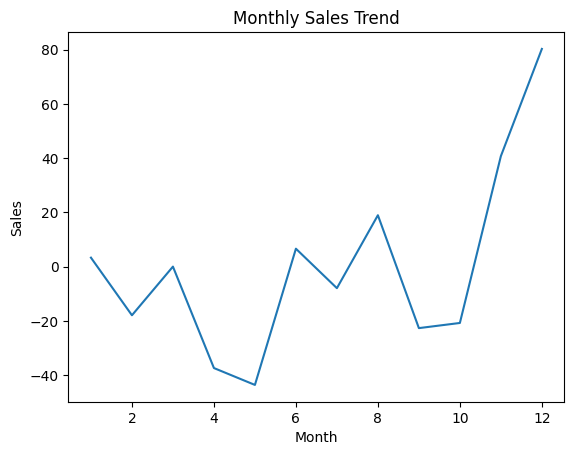

In [74]:
monthly_sales = data.groupby('month')['sales'].sum()

plt.figure()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


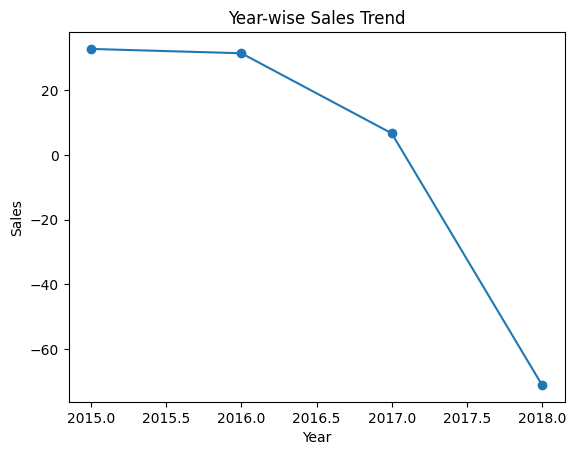

In [75]:
yearly_sales = data.groupby('year')['sales'].sum()

plt.figure()
yearly_sales.plot(marker='o')
plt.title("Year-wise Sales Trend")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()


In [77]:
# STEP 4: Create Lag Features (Past 7 Days)
for i in range(1, 8):
    daily_sales[f'lag_{i}'] = daily_sales['sales'].shift(i)

daily_sales.dropna(inplace=True)  

In [78]:
# STEP 5: Features & Target
X = daily_sales.drop('sales', axis=1)
y = daily_sales['sales']


In [79]:
# STEP 6: Train Random Forest on full data (for tomorrow prediction)
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X, y)


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [80]:
# STEP 7: Evaluate Model on last 7 days (optional, historical)
X_test = X[-7:]
y_test = y[-7:]
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation on Last 7 Days:")
print("MAE:", round(mae,2))
print("RMSE:", round(rmse,2))
print("R2 Score:", round(r2,2))

Model Evaluation on Last 7 Days:
MAE: 0.84
RMSE: 1.03
R2 Score: 0.88


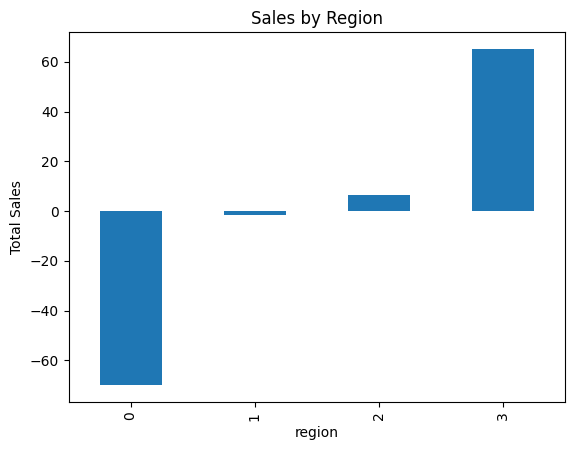

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by region and sum sales
region_sales = data.groupby('region')['sales'].sum()

# Plot
region_sales.plot(kind='bar', title='Sales by Region')
plt.ylabel('Total Sales')
plt.show()

